In [1]:
# Imports
import numpy as np
import math
import time
import json
import pandas as pd
import requests
from pandas import json_normalize
import os
import csv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
def read_df(i):
    df = pd.read_csv("Season"+str(i)+".csv",encoding = 'utf-8-sig',low_memory=False)
    return df

In [3]:
season = ['08/09','09/10','10/11','11/12','12/13','13/14','14/15','15/16','16/17','17/18','18/19']

In [4]:
def presses(i):
    df = read_df(i)
    totalmatches = len(df.match_id.dropna().unique().tolist())
    press5 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute<=5)"))
    press10 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>5)&(minute<=10)"))
    press15 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>10)&(minute<=15)"))
    press20 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>15)&(minute<=20)"))
    press25 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>20)&(minute<=25)"))
    press30 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>25)&(minute<=30)"))
    press35 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>30)&(minute<=35)"))
    press40 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>35)&(minute<=40)"))
    press45 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>40)&(minute<=45)"))
    press50 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>45)&(minute<=50)"))
    press55 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>50)&(minute<=55)"))
    press60 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>55)&(minute<=60)"))
    press65 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>60)&(minute<=65)"))
    press70 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>65)&(minute<=70)"))
    press75 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>70)&(minute<=75)"))
    press80 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>75)&(minute<=80)"))
    press85 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>80)&(minute<=85)"))
    press90 = len(df.query("(type_name=='Pressure')&(team_name=='Barcelona')&(minute>85)"))
    press = [press5,press10,press15,press20,press25,press30,press35,press40,press45,press50,press55,press60,
            press65,press70,press75,press80,press85,press90]
    return totalmatches,press

In [5]:
# def radarplotter():
#     tm = []
#     ps = []
#     for i in range(10):
#         totalmatches,press = presses(i)
#         tm.append(totalmatches)
#         ps.append(press)
#     N = len(ps[0])
#     theta = np.linspace(0.0+2*np.pi/(2*N), 2 * np.pi+2*np.pi/(2*N), N, endpoint=False)
#     width = 2*np.pi/N-0.05
#     labels = ['0', '5', '10', '15', '20','25','30','35','40','45','50','55','60','65','70','75','80','85']
#     fig = plt.figure(tight_layout=True,figsize=(20,60))
#     gs = gridspec.GridSpec(5, 2)
#     for i in range(10):
#         radii = [ps[i][j]/tm[i] for j in range(N)]
#         ax = fig.add_subplot(gs[i//2, i%2],projection='polar')
#         ax.bar(theta, radii, width=width, bottom=0.0, color='magenta', alpha=0.5)
#         ax.set_xticks(np.linspace(0.0, 2.0*np.pi, N, endpoint=False))
#         ax.set_xticklabels(labels)
#         ax.set_title('Barcelona Avg Pressing per game in season '+str(season[i]))
#     fig.suptitle('The circular axis shows 5 minute intervals starting from 0'+'\n'+
#             'The interval from 85 to 0 is to be read as interval from minute 85 to 90'+'\n'+
#             'All added times have been discarded here'+'\n'+
#             'The radial axis shows the number of pressure events per game in a particular minute range'+'\n'+
#             'All data provided by Statsbomb')
#     fig.savefig('pressurebefore1819')
# ps = radarplotter()

In [6]:
# totalmatches, press = presses(10)
# N = len(press)
# y_pos = np.arange(N)
# labels = ['0', '5', '10', '15', '20','25','30','35','40','45','50','55','60','65','70','75','80','85']
# radii = [press[i]/totalmatches for i in range(N)]
# fig = plt.figure(figsize=(8,4),tight_layout=True)
# ax = plt.subplot(111)
# ax.bar(y_pos, radii, align='edge', color='lightcoral', alpha=0.5)
# ax.set_xticks(y_pos)
# ax.set_xticklabels(labels)
# ax.set_xlabel('Minutes')
# ax.set_ylabel('Avg pressures per game')
# ax.set_ylim((0,14))
# ax.set_title('Barcelona Pressures per game in every 5 minute intervals excluding added times'+'\n'+
#             'Season :'+str(season[10])+'\n'+
#             'All data provided by Statsbomb')
# fig.savefig('pressure1819')

In [7]:
# fig.savefig('pressure201819')

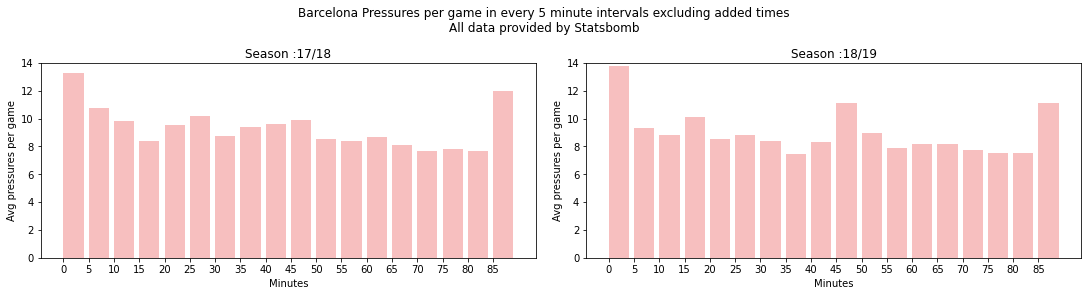

In [15]:
def pressurebarchart():
    tm = []
    ps = []
    for i in range(9,11):
        totalmatches,press = presses(i)
        tm.append(totalmatches)
        ps.append(press)
    N = len(ps[0])
    y_pos = np.arange(N)
    labels = ['0', '5', '10', '15', '20','25','30','35','40','45','50','55','60','65','70','75','80','85']
    fig = plt.figure(constrained_layout=True,figsize=(15,4))
    hr = [1]
    wr = [1,1]
    ny = len(hr)
    nx = len(wr)
    gs = gridspec.GridSpec(ny,nx, figure=fig,height_ratios=hr,width_ratios=wr,hspace=0.08, wspace=0.1)
    for i in range(2):
        radii = [ps[i][j]/tm[i] for j in range(N)]
        ax = fig.add_subplot(gs[0, i%2])
        ax.bar(y_pos, radii, align='edge', color='lightcoral', alpha=0.5)
        ax.set_xticks(y_pos)
        ax.set_xticklabels(labels)
        ax.set_xlabel('Minutes')
        ax.set_ylabel('Avg pressures per game')
        ax.set_ylim((0,14))
        ax.set_title('Season :'+str(season[9+i]))
    fig.suptitle('Barcelona Pressures per game in every 5 minute intervals excluding added times'+'\n'+
            'All data provided by Statsbomb')
    fig.savefig('pressureEV')
pressurebarchart()